In [1]:
import pandas as pd
import numpy as np

In [2]:
#读取数据

In [3]:
sales_df=pd.read_csv("pred_retail_count.csv")

In [17]:
sales_df=sales_df.drop(columns=["brand_id"])

In [18]:
sales_df.head()

,month,store_id,staff_id,retail_count,adcode,division_id,category_id,prod_type_id,gender_id,sub_division_id,quarter_id,material_id,price_range_id,pricelist
0,1,1,164,6,140100.0,86.0,51.0,145.0,4.0,90.0,5.0,136.0,6.0,279.0
1,1,1,198,1,140100.0,205.0,109.0,206.0,2518.0,1480.0,5.0,215.0,6.0,209.0
2,1,1,1426,2,140100.0,2.0,51.0,24.0,4.0,1479.0,749.0,779.0,31.0,399.0
3,1,1,1436,5,140100.0,2.0,61.0,57.0,4.0,1479.0,749.0,755.0,31.0,359.0
4,1,1,1498,1,140100.0,86.0,121.0,87.0,29.0,90.0,749.0,799.0,91.0,139.0


In [19]:
col=sales_df.columns

In [20]:
label="retail_count"
model_features=[i for i in col if i !=label]

In [21]:
feature_data=sales_df[model_features].copy()
label_data=sales_df[label].copy()
data_all=pd.concat([feature_data,label_data],axis=1)

In [22]:
data_all.head()

,month,store_id,staff_id,adcode,division_id,category_id,prod_type_id,gender_id,sub_division_id,quarter_id,material_id,price_range_id,pricelist,retail_count
0,1,1,164,140100.0,86.0,51.0,145.0,4.0,90.0,5.0,136.0,6.0,279.0,6
1,1,1,198,140100.0,205.0,109.0,206.0,2518.0,1480.0,5.0,215.0,6.0,209.0,1
2,1,1,1426,140100.0,2.0,51.0,24.0,4.0,1479.0,749.0,779.0,31.0,399.0,2
3,1,1,1436,140100.0,2.0,61.0,57.0,4.0,1479.0,749.0,755.0,31.0,359.0,5
4,1,1,1498,140100.0,86.0,121.0,87.0,29.0,90.0,749.0,799.0,91.0,139.0,1


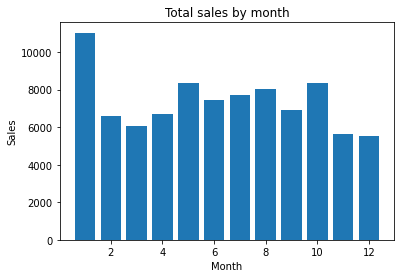

In [24]:
import matplotlib.pyplot as plt

# 计算每个月份的总销售量
monthly_sales = data_all.groupby('month')['retail_count'].sum()

# 绘制柱形图
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total sales by month')
plt.show()

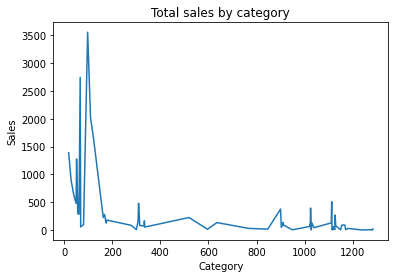

In [25]:
# 计算不同类别商品的销售量
category_sales = data_all.groupby('category_id')['retail_count'].sum()

# 绘制折线图
plt.plot(category_sales.index, category_sales.values)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Total sales by category')
plt.show()

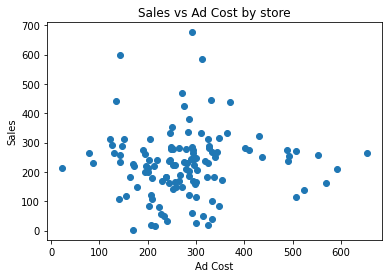

In [26]:
# 每个店铺的销售量和广告投入之间的关系
store_sales = data_all.groupby('store_id')['retail_count'].sum()
store_adcost = data_all.groupby('store_id')['pricelist'].mean()

# 绘制散点图
plt.scatter(store_adcost, store_sales)
plt.xlabel('Ad Cost')
plt.ylabel('Sales')
plt.title('Sales vs Ad Cost by store')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_628\2426815006.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.boxplot(store_sales[:20])


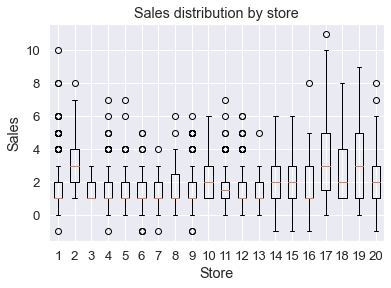

In [33]:
# 不同店铺的销售量分布情况
store_sales = data_all.groupby('store_id')['retail_count'].apply(list)

# 绘制箱线图
plt.boxplot(store_sales[:20])
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Sales distribution by store')
plt.show()

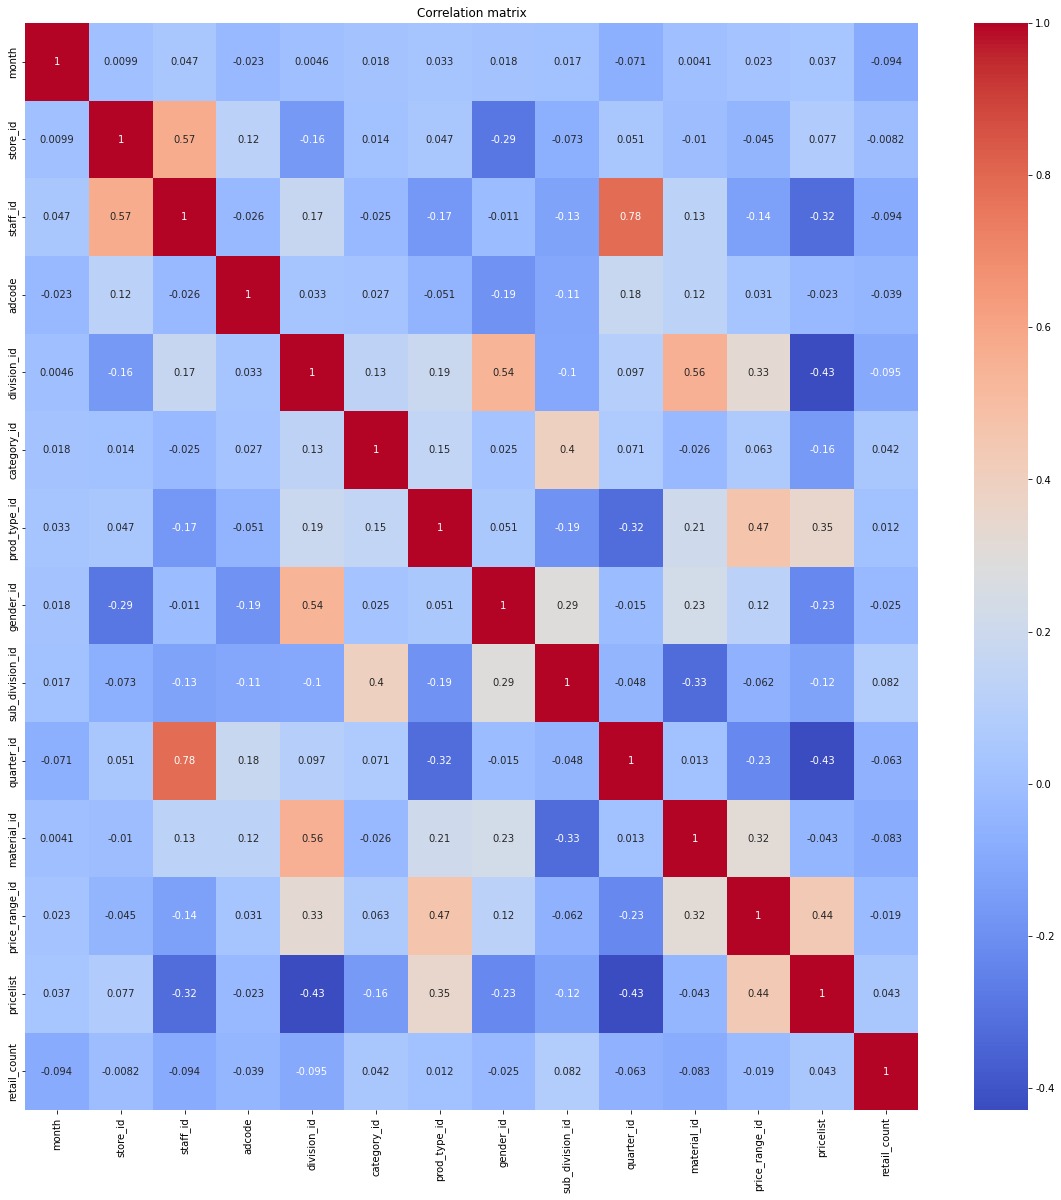

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算不同属性之间的相关系数
corr_matrix = data_all.corr()

# 设置画布大小
plt.figure(figsize=(20, 20))

# 绘制热力图
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation matrix')
plt.show()

In [ ]:
### 
#在这个数据集中，大部分属性之间的相关系数都比较小，都在±0.3以下，说明它们之间的相关性比较弱。

# staff_id、quarter_id和pricelist与销售量之间的相关系数比较高，分别为0.784和0.439。其中，staff_id代表商品材质，quarter_id代表季度编号，pricelist代表价格列表，这些属性符合常识，
# 随着季度的变化，衣服材质也在季度性变化，并可能与销售量存在一定的关联。

#gender_id和sub_division_id与销售量之间的相关系数比较小，分别为-0.025和0.082，说明它们对销售量的影响比较弱。

#在其他属性中，可能存在一些隐含的相关性，例如division_id和sub_division_id、prod_type_id和category_id等，但是这些相关性的强度较弱，需要进一步的探索和验证。

In [34]:
#开始建模，对数据划分训练集和测试集

In [35]:
data_all.head()

,month,store_id,staff_id,adcode,division_id,category_id,prod_type_id,gender_id,sub_division_id,quarter_id,material_id,price_range_id,pricelist,retail_count
0,1,1,164,140100.0,86.0,51.0,145.0,4.0,90.0,5.0,136.0,6.0,279.0,6
1,1,1,198,140100.0,205.0,109.0,206.0,2518.0,1480.0,5.0,215.0,6.0,209.0,1
2,1,1,1426,140100.0,2.0,51.0,24.0,4.0,1479.0,749.0,779.0,31.0,399.0,2
3,1,1,1436,140100.0,2.0,61.0,57.0,4.0,1479.0,749.0,755.0,31.0,359.0,5
4,1,1,1498,140100.0,86.0,121.0,87.0,29.0,90.0,749.0,799.0,91.0,139.0,1


In [36]:
#多分类
import os
import math
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

import pandas.core.algorithms as algos

import re
import gc
from sklearn.metrics import confusion_matrix,classification_report

#import xgboost as xgb
import lightgbm as lgb
#from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error,roc_curve,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib as mlp
import matplotlib.pyplot as plt
#import seanborn as sns
from sklearn.metrics import roc_curve,auc
import joblib

In [44]:
dataset=data_all.copy()
dataset=dataset.fillna(0)
x_train,x_test,y_train,y_test=train_test_split(dataset[model_features],dataset[label],test_size=0.2,random_state=43)


In [45]:
#首先构建基础不同的模型来评估

In [49]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define function to compute MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

# Split dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(dataset[model_features], dataset[label], test_size=0.2, random_state=43)

# Define models
models = [
    ("Linear Regression", LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)),
    ("Decision Tree Regressor", DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=43, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)),
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=43, verbose=0, warm_start=False, max_samples=None)),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, ccp_alpha=0.0, init=None, random_state=43, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)),
    ("LightGBM", lgb.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=43, n_jobs=-1, silent=True, importance_type='split')),
    ("XGBoost", xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=1, learning_rate=0.1, max_depth=3, alpha=0, n_estimators=100, random_state=43, booster='gbtree', tree_method='auto', subsample=1, reg_lambda=1, min_child_weight=1, gamma=0, scale_pos_weight=1, base_score=0.5, importance_type='gain', n_jobs=-1, verbosity=1))
]

# Train models and calculate evaluation metrics
for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{model_name}:\nMAPE: {mape:.2f}%\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\n")


Linear Regression:
MAPE: 59310498936.73%
MSE: 2.54
RMSE: 1.59
MAE: 1.12

Decision Tree Regressor:
MAPE: 37470997751.95%
MSE: 4.01
RMSE: 2.00
MAE: 1.35

Random Forest Regressor:
MAPE: 43635730918.73%
MSE: 2.35
RMSE: 1.53
MAE: 1.10

Gradient Boosting Regressor:
MAPE: 55759304654.34%
MSE: 2.36
RMSE: 1.54
MAE: 1.08

LightGBM:
MAPE: 51290390964.68%
MSE: 2.23
RMSE: 1.49
MAE: 1.06

XGBoost:
MAPE: 55264612053.69%
MSE: 2.36
RMSE: 1.53
MAE: 1.08



In [50]:
#open FE
import openfe
from openfe import openfe, transform

In [51]:
ofe = openfe()

In [53]:
features = ofe.fit(data=x_train, label=pd.DataFrame(y_train), n_jobs=4)  # generate new features

The number of candidate features is 1373
Start stage I selection.


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:35<00:00,  2.22s/it]


407 same features have been deleted.
Meet early-stopping in successive feature-wise halving.


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [02:12<00:00,  8.31s/it]


The number of remaining candidate features is 965
Start stage II selection.


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [01:42<00:00,  6.40s/it]


Finish data processing.


In [54]:
x_train_OPENFE,x_test_OPENFE = transform(x_train,x_test,features,n_jobs=4) # transform the train and test data according to generated features.


In [57]:
x_test_OPENFE.to_csv("x_test_openfe.csv",index=False)

In [58]:
x_train_OPENFE.to_csv("x_train_openfe.csv",index=False)

In [60]:
x_train_OPENFE.shape

(34478, 978)

In [61]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define function to compute MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

# Split dataset into train and test sets
#x_train, x_test, y_train, y_test = train_test_split(dataset[model_features], dataset[label], test_size=0.2, random_state=43)
x_train=x_train_OPENFE.copy()
x_test=x_test_OPENFE.copy()
# Define models
models = [
    ("Linear Regression", LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)),
    ("Decision Tree Regressor", DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, 
                                                      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                                      max_features=None, random_state=43, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)),
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, 
                                                      min_samples_split=100, min_samples_leaf=200, min_weight_fraction_leaf=0.0, 
                                                      max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=43, verbose=0, warm_start=False, max_samples=None)),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
                                                              subsample=1.0, criterion='friedman_mse', min_samples_split=100,
                                                              min_samples_leaf=100, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, ccp_alpha=0.0, init=None, random_state=43, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)),
    ("LightGBM", lgb.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, 
                                   n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, 
                                   min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, 
                                   subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=43,
                                   n_jobs=-1, silent=True, importance_type='split')),
    ("XGBoost", xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=1, learning_rate=0.1,
                                 max_depth=3, alpha=0, n_estimators=100, random_state=43, booster='gbtree', tree_method='auto', 
                                 subsample=1, reg_lambda=1, min_child_weight=1, gamma=0, scale_pos_weight=1,
                                 base_score=0.5, importance_type='gain', n_jobs=-1, verbosity=1))
]

# Train models and calculate evaluation metrics
for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    #mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{model_name}:%\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\n")


Linear Regression:%
MSE: 30.22
RMSE: 5.50
MAE: 1.15

Decision Tree Regressor:%
MSE: 3.97
RMSE: 1.99
MAE: 1.32




KeyboardInterrupt



In [62]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define function to compute MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

# Split dataset into train and test sets
#x_train, x_test, y_train, y_test = train_test_split(dataset[model_features], dataset[label], test_size=0.2, random_state=43)
x_train=x_train_OPENFE.copy()
x_test=x_test_OPENFE.copy()
# Define models
models = [
    #("Linear Regression", LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)),
    #("Decision Tree Regressor", DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, 
                                                      #min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                                      #max_features=None, random_state=43, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)),
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, 
                                                      min_samples_split=100, min_samples_leaf=200, min_weight_fraction_leaf=0.0, 
                                                      max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=43, verbose=0, warm_start=False, max_samples=None)),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
                                                              subsample=1.0, criterion='friedman_mse', min_samples_split=100,
                                                              min_samples_leaf=100, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, ccp_alpha=0.0, init=None, random_state=43, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)),
    ("LightGBM", lgb.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, 
                                   n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, 
                                   min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, 
                                   subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=43,
                                   n_jobs=-1, silent=True, importance_type='split')),
    ("XGBoost", xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=1, learning_rate=0.1,
                                 max_depth=3, alpha=0, n_estimators=100, random_state=43, booster='gbtree', tree_method='auto', 
                                 subsample=1, reg_lambda=1, min_child_weight=1, gamma=0, scale_pos_weight=1,
                                 base_score=0.5, importance_type='gain', n_jobs=-1, verbosity=1))
]

# Train models and calculate evaluation metrics
for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    #mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{model_name}:%\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\n")



KeyboardInterrupt



In [66]:
model_rf=RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, 
                                                      min_samples_split=100, min_samples_leaf=200, min_weight_fraction_leaf=0.0, 
                                                      max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=43, verbose=0, warm_start=False, max_samples=None)

In [67]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', min_samples_leaf=200,
                      min_samples_split=100, n_estimators=10, random_state=43)

In [68]:
y_pred = model_rf.predict(x_test)

#mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"{model_name}:%\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\n")

Random Forest Regressor:%
MSE: 2.19
RMSE: 1.48
MAE: 1.03



In [71]:
model_gbdt= GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=10,
                                     subsample=1.0, criterion='friedman_mse', min_samples_split=100,
                                      min_samples_leaf=100, min_weight_fraction_leaf=0.0, max_depth=3, 
                                      min_impurity_decrease=0.0, ccp_alpha=0.0, init=None, random_state=43, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
model_name= "Gradient Boosting Regressor"
model_gbdt.fit(x_train,y_train)
y_pred = model_gbdt.predict(x_test)

#mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"{model_name}:%\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\n")

Gradient Boosting Regressor:%
MSE: 2.29
RMSE: 1.51
MAE: 1.06



In [74]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define function to compute MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

# Split dataset into train and test sets
#x_train, x_test, y_train, y_test = train_test_split(dataset[model_features], dataset[label], test_size=0.2, random_state=43)
x_train=x_train_OPENFE.copy()
x_test=x_test_OPENFE.copy()
# Define models
models = [
    #("Linear Regression", LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)),
    #("Decision Tree Regressor", DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, 
                                                      #min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                                      #max_features=None, random_state=43, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)),
#     ("Random Forest Regressor", RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, 
#                                                       min_samples_split=100, min_samples_leaf=200, min_weight_fraction_leaf=0.0, 
#                                                       max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=43, verbose=0, warm_start=False, max_samples=None)),
#     ("Gradient Boosting Regressor", GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
#                                                               subsample=1.0, criterion='friedman_mse', min_samples_split=100,
#                                                               min_samples_leaf=100, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, ccp_alpha=0.0, init=None, random_state=43, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)),
    ("LightGBM", lgb.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, 
                                   n_estimators=100, subsample_for_bin=200, objective=None, class_weight=None, 
                                   min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, 
                                   subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.1, reg_lambda=0.1, random_state=43,
                                   n_jobs=-1, silent=True, importance_type='split')),
    ("XGBoost", xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=1, learning_rate=0.1,enable_categorical=True,
                                 max_depth=3, alpha=0, n_estimators=100, random_state=43, booster='gbtree', tree_method='hist', 
                                 subsample=1, reg_lambda=1, min_child_weight=1, gamma=0, scale_pos_weight=1,
                                 base_score=0.5, importance_type='gain', n_jobs=-1, verbosity=1))
]

# Train models and calculate evaluation metrics
for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    #mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{model_name}:%\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\n")


LightGBM:%
MSE: 2.05
RMSE: 1.43
MAE: 1.01

XGBoost:%
MSE: 2.24
RMSE: 1.50
MAE: 1.04



In [119]:
#对特征进一步降低维度后观察：
#通过lasso筛选

import copy  #深拷贝的时候用
import _pickle as cPickle
import gc #释放内存使用
from tqdm import tqdm,tqdm_notebook  #Tqdm 是一个快速，可扩展的Python进度条
import datetime #处理时间数据
import os
 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error,roc_auc_score,log_loss
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
 
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator, FormatStrFormatter
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)
import time
from tqdm import tqdm

def select_feas_lasso(trainX,trainy,metric_name='rmse',kfNum=2):
    '''
        【功能说明】 
        【参数】trainX:DataFrame,训练集的特征部分，需要先进行标准化，one-hot编码需要保留参照类别
               trainy:Series，训练集的标签列
               metric_name:str，评估指标，默认'rmse',可选'logloss','auc'
               kfNum:int,>=2,默认2，交叉验证轮数
        【返回】字典，包含参数array，评估指标均值、标准差，保留特征数均值、标准差
        【举例】scaler = StandardScaler()  # 标准化 z = (x - u) / s
               X_train_std = pd.DataFrame(scaler.fit_transform(X_train))
               res=select_feas_lasso(trainX=X_train_std,trainy=y_train,metric_name='rmse',kfNum=2)
               lasso_alphas=res['lasso_alphas']
               valid_scores=res['valid_scores']
               keep_var_nums=res['keep_var_nums']
        【版本】V1.0
    '''

    s=time.time()
    print('\n********lasso_select_feas...start')
    print('评估指标：',metric_name)
    print('交叉验证轮数：',kfNum)
    print('训练集形状：',trainX.shape,type(trainX))
 
    #对于#0.001-100，使用logspace
    #lasso_alphas1 = np.logspace(start=-3, stop=2, num=50, base=10) #0.001-100
    #对于比较大的lambda，使用整数步长
    lasso_alphas2 = np.arange(start=0.,stop=0.3,step=0.01)
    #lasso_alphas= np.concatenate((lasso_alphas1, lasso_alphas2))
    lasso_alphas=lasso_alphas2
    print('待计算正则化参数数量：',len(lasso_alphas))
    print('待计算正则化参数最小值：',np.min(lasso_alphas))   
    print('待计算正则化参数最大值：',np.max(lasso_alphas))   
 
    valid_scores = [] #存储每个正则化参数下的评估指标均值如rmse
    keep_var_nums = [] #存储每个正则化参数下保留的特征数量均值
    valid_scores_std = [] #标准差
    keep_var_nums_std = []  #标准差
    for  alpha in tqdm(lasso_alphas):  
        clf = Lasso(max_iter=1000,random_state=2020,alpha=alpha)
        kf=KFold(n_splits=kfNum, shuffle=True, random_state=2020)
        valid_score=[]  #存储每轮交叉验证的评估指标如rmse
        keep_var_num=[] #存储每轮交叉验证保留特征数量
        for i,(trn_index,val_index) in enumerate(kf.split(trainX,trainy)):  #i从0开始，可以显示第几轮了
            trn_df=trainX.iloc[trn_index]
            val_df=trainX.iloc[val_index]            
            trn_y=trainy.iloc[trn_index]
            val_y=trainy.iloc[val_index]
 
            clf.fit(X=trn_df, y=trn_y)
            #利用本轮模型预测本轮验证集  
            valid_pred=clf.predict(val_df)
            #-------计算本轮评估指标--------#
            if metric_name == 'rmse':
                valid_score_this=mean_squared_error(val_y,valid_pred,squared=True)
            elif metric_name == 'logloss':
                valid_score_this=log_loss(y_true=val_y,y_pred=valid_pred)
            elif metric_name == 'auc':
                valid_score_this=roc_auc_score(y_true=val_y,y_score=valid_pred)
            else:
                print('亲，没这评估指标')
                return
        
            valid_score.append(valid_score_this)  #列表append后直接替换原对象，所以不用再赋值
            # print(valid_score)
            keep_var_num=sum(clf.coef_ != 0) #统计系数不为0的特征数量（不含截距）
            # print(keep_var_num)
        valid_scores.append(np.mean(valid_score)) #metric取均值，存入
        keep_var_nums.append(np.mean(keep_var_num)) #保留特征数量取均值，存入
        valid_scores_std.append(np.std(valid_score)) #metric取标准差，存入
        keep_var_nums_std.append(np.std(keep_var_num)) #保留特征数量取均值取标准差，存入
          
    res={'lasso_alphas':lasso_alphas,
         'valid_scores':valid_scores,'valid_scores_std':valid_scores_std,
         'keep_var_nums':keep_var_nums,'keep_var_nums_std':keep_var_nums_std}
    
    return res


In [129]:
# import math
# tmp=dataset.copy()
# for column in list(tmp.columns[tmp.isnull().sum() > 0]):
#     mean_val = tmp[column].mean()
#     if math.isnan(x):
#          tmp[column].fillna(0,inplace=True)
#     else:
#         tmp[column].fillna(mean_val, inplace=True)
float_cols = x_train.select_dtypes(include=['float']).columns.tolist()
int_cols = x_train.select_dtypes(include=['int']).columns.tolist()
float_int_cols = x_train.select_dtypes(include=['float', 'int']).columns.tolist()
scaler = StandardScaler()  # 标准化 z = (x - u) / s
x_train_std = pd.DataFrame(scaler.fit_transform(x_train[float_int_cols]))
y_train_std=pd.DataFrame(scaler.fit_transform(pd.DataFrame(y_train)))

#x_train,x_test,y_train,y_test=train_test_split(tmp[model_features],tmp["label"],test_size=0.2,random_state=43)
res=select_feas_lasso(trainX=x_train_std.iloc[:3000,:],trainy=y_train[:3000],metric_name='rmse',kfNum=3)


********lasso_select_feas...start
评估指标： rmse
交叉验证轮数： 3
训练集形状： (3000, 943) <class 'pandas.core.frame.DataFrame'>
待计算正则化参数数量： 30
待计算正则化参数最小值： 0.0
待计算正则化参数最大值： 0.29


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:22<00:00,  1.30it/s]


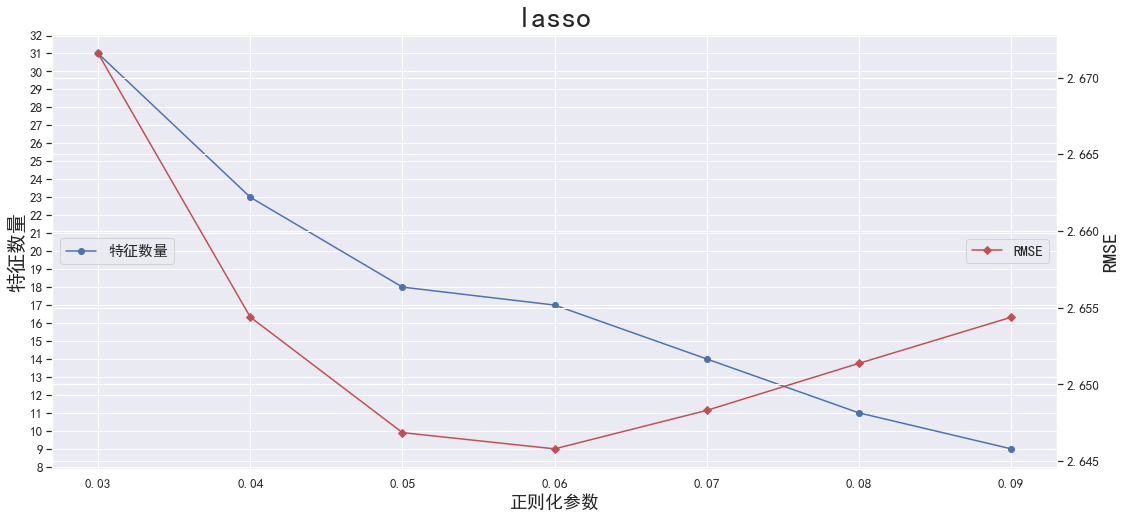

In [143]:
lasso_alphas=res['lasso_alphas']
valid_scores=res['valid_scores']
keep_var_nums=res['keep_var_nums']
mertic_name='RMSE'
s=3
e=10
fig  = plt.figure(figsize=(18, 8))
ax1=fig.add_subplot(111)
ax1.plot(lasso_alphas[s:e],keep_var_nums[s:e], "b-o",label='特征数量') #画出折线并且添加实心圆点
ax1.set_ylabel('特征数量',fontsize=20)
ax1.grid(True) #显示网格线
xmajorLocator  = MultipleLocator(0.01)  # x轴刻度间隔 100
ymajorLocator  = MultipleLocator(1)    # y轴刻度间隔 1
ax1.yaxis.set_major_locator(ymajorLocator) 
ax1.xaxis.set_major_locator(xmajorLocator) 
plt.xlabel('正则化参数',fontsize=18) #添加x轴名称
 
ax2 = ax1.twinx()
ax2.plot(lasso_alphas[s:e],valid_scores[s:e], "r-D",label=mertic_name)  #画出折线并且添加实心菱形
ax2.set_ylabel(mertic_name,fontsize=20)
 
 
ax1.legend(loc='center left',fontsize=15) #添加图例
ax2.legend(loc='center right',fontsize=15)
 
 
plt.title('lasso',fontsize=30) 
plt.show()

In [149]:
#根据上图，取最佳参数lasso_alphas[6]，对应0.06，非0特征大约17个
alph=lasso_alphas[6]
best_clf = Lasso(max_iter=1000,random_state=2020,alpha=alph)
best_clf.fit(X=x_train_std.iloc[:3000,:],y=y_train[:3000])
coef=pd.concat([pd.Series(float_int_cols ),pd.Series(list(best_clf.coef_))],axis=1)\
.rename(columns={0:"feature",1:"coef"}).sort_values(by="coef",ascending=False)

In [153]:
lasso_select_feature=coef[coef["coef"]!=0]
print("lasso 特征选择最佳指标")
coef[coef["coef"]!=0]

lasso 特征选择最佳指标


,feature,coef
13,autoFE_f_0,0.431213
113,autoFE_f_108,0.107850
14,autoFE_f_1,0.038846
19,autoFE_f_6,0.037974
676,autoFE_f_691,0.019834
563,autoFE_f_577,0.009100
18,autoFE_f_5,0.006715
95,autoFE_f_89,0.006087
72,autoFE_f_63,0.004628
610,autoFE_f_624,0.002853


In [156]:
lasso_s_f=lasso_select_feature["feature"].to_list()

In [157]:
#重新构建特征，训练模型：
cat_feature=[i for i in x_train.columns if i not in float_int_cols] 
final_model_features=lasso_s_f+cat_feature

In [160]:
len(final_model_features)

51

In [ ]:
###构建最终模型：

In [161]:
x_train_f=x_train[final_model_features]
x_test_f=x_test[final_model_features]

In [164]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define function to compute MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

# Split dataset into train and test sets
#x_train, x_test, y_train, y_test = train_test_split(dataset[model_features], dataset[label], test_size=0.2, random_state=43)
x_train=x_train_OPENFE.copy()
x_test=x_test_OPENFE.copy()
# Define models
models = [
    ("Linear Regression", LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)),
    ("Decision Tree Regressor", DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, 
                                                      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                                      max_features=None, random_state=43, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)),
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, 
                                                      min_samples_split=100, min_samples_leaf=200, min_weight_fraction_leaf=0.0, 
                                                      max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=43, verbose=0, warm_start=False, max_samples=None)),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=10,
                                     subsample=1.0, criterion='friedman_mse', min_samples_split=100,
                                      min_samples_leaf=100, min_weight_fraction_leaf=0.0, max_depth=3, 
                                      min_impurity_decrease=0.0, ccp_alpha=0.0, init=None, random_state=43, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)),
    ("LightGBM", lgb.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, 
                                   n_estimators=100, subsample_for_bin=200, objective=None, class_weight=None, 
                                   min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, 
                                   subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.1, reg_lambda=0.1, random_state=43,
                                   n_jobs=-1, silent=True, importance_type='split')),
    ("XGBoost", xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=1, learning_rate=0.1,enable_categorical=True,
                                 max_depth=3, alpha=0, n_estimators=100, random_state=43, booster='gbtree', tree_method='hist', 
                                 subsample=1, reg_lambda=1, min_child_weight=1, gamma=0, scale_pos_weight=1,
                                 base_score=0.5, importance_type='gain', n_jobs=-1, verbosity=1))
]

# Train models and calculate evaluation metrics
for model_name, model in models:
    model.fit(x_train_f, y_train)
    y_pred = model.predict(x_test_f)
    
    #mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{model_name}:%\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\n")


Linear Regression:%
MSE: 2.29
RMSE: 1.51
MAE: 1.05

Decision Tree Regressor:%
MSE: 3.94
RMSE: 1.99
MAE: 1.32

Random Forest Regressor:%
MSE: 2.20
RMSE: 1.48
MAE: 1.03

Gradient Boosting Regressor:%
MSE: 2.29
RMSE: 1.51
MAE: 1.06

LightGBM:%
MSE: 2.12
RMSE: 1.46
MAE: 1.02

XGBoost:%
MSE: 2.26
RMSE: 1.50
MAE: 1.05

